In [ ]:
# !pip install kaggle
# from google.colab import files

In [ ]:
# files.upload()

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download ninadaithal/imagesoasis

In [ ]:
# !unzip imagesoasis.zip

In [ ]:
import matplotlib.pyplot as plt

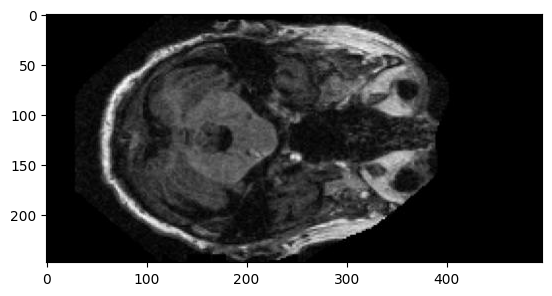

In [ ]:
test = plt.imread("Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg")
plt.imshow(test)

In [ ]:
import numpy as np
import os
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import imutils
import shutil

2023-10-30 20:35:43.605922: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))

In [ ]:
path1 = path1[0:6000]
path2 = path2[0:6000]
path3 = path3[0:6000]
path4 = path4[0:6000]

In [ ]:
 #labels dictionary
labels_dict = {
    0: 'Non Demented',
    1: 'Mild Dementia',
    2: 'Moderate Dementia',
    3: 'Very Mild Dementia'
}

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [ ]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(17515, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape((data.shape[0],4))
result.shape

(17515, 4)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle = True,random_state=42)

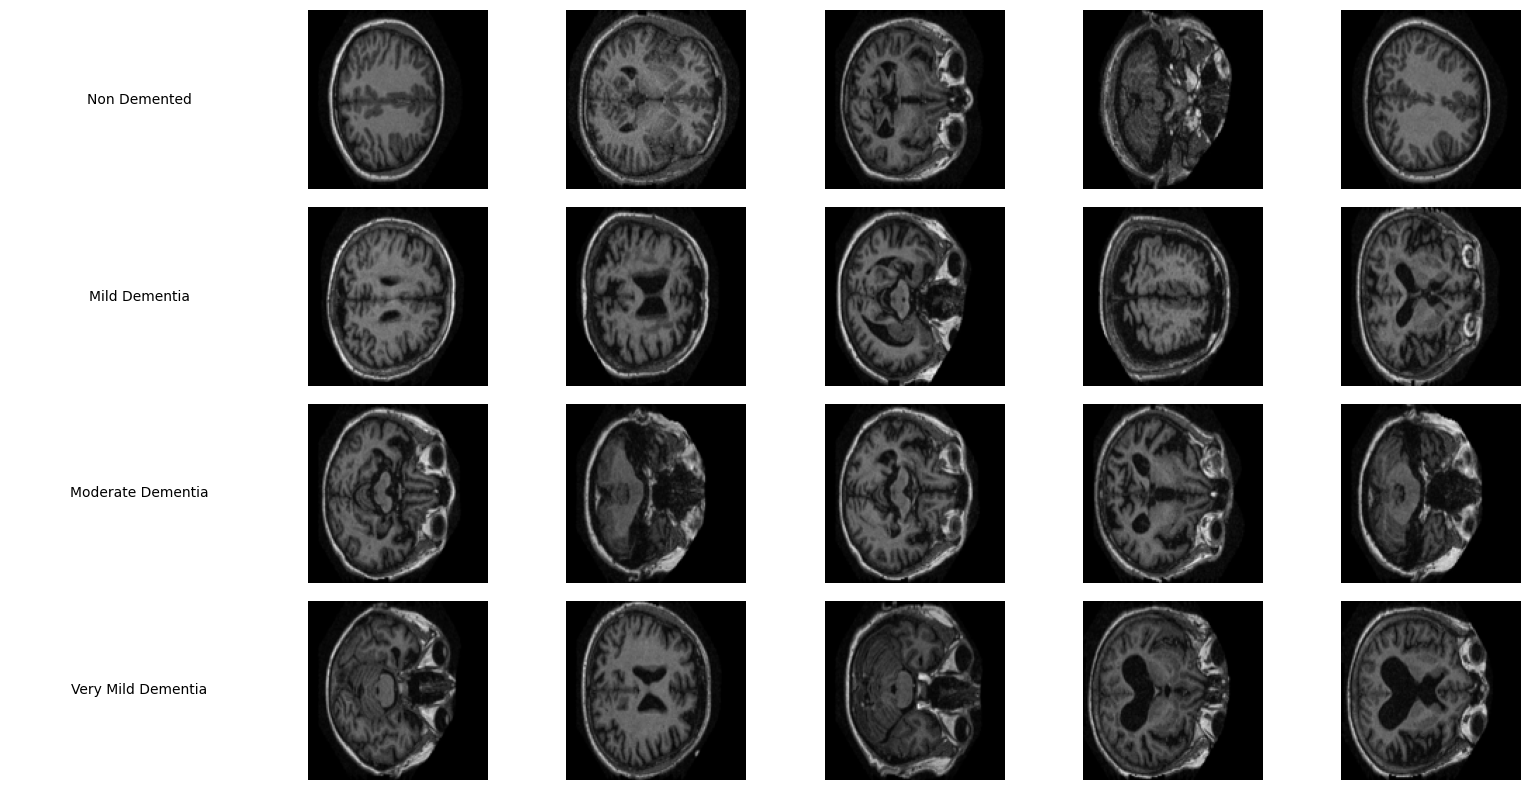

In [ ]:
def plot_samples(X, y, labels_dict, n=5, label_fontsize=8, figsize=(18, 8)):
    """
    Creates a gridplot for desired number of images (n) from the specified set.
    Each row will have a single label for all the images in that row.
    """
    num_classes = len(labels_dict)
    fig, axes = plt.subplots(num_classes, n+1, figsize=figsize)
    plt.subplots_adjust(wspace=0.0001, hspace=0.1)

    for class_index in range(num_classes):
        class_label = labels_dict[class_index]
        class_samples = X[np.where(np.argmax(y, axis=1) == class_index)][:n]

        ax = axes[class_index, 0]
        ax.text(0.5, 0.5, f'{class_label}', fontsize=label_fontsize, ha='center', va='center')
        ax.axis('off')

        for i, sample in enumerate(class_samples):
            ax = axes[class_index, i + 1]
            ax.imshow(sample)
            ax.axis('off')


plot_samples(x_train, y_train, labels_dict, n=5, label_fontsize=10, figsize=(20, 10))

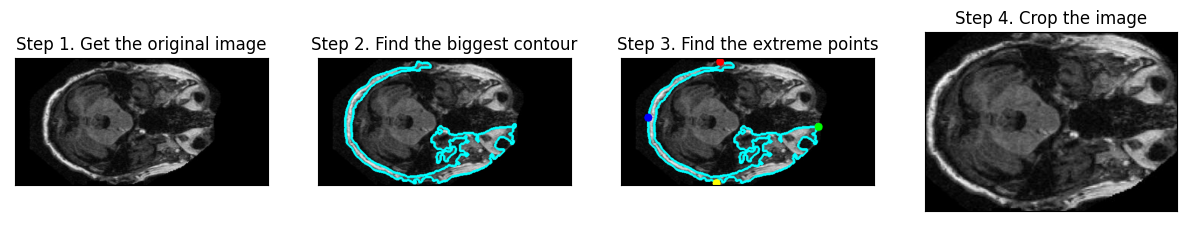

In [ ]:
def crop_and_display_image(img_path, add_pixels_value=0):
    # Read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color channels to RGB

    # Step 1: Original Image
    plt.figure(figsize=(15,6))
    plt.subplot(141)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 1. Get the original image')

    # Step 2: Find the biggest contour
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

    plt.subplot(142)
    plt.imshow(img_cnt)
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 2. Find the biggest contour')

    # Step 3: Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    plt.subplot(143)
    plt.imshow(img_pnt)
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 3. Find the extreme points')

    # Step 4: Crop the image
    ADD_PIXELS = add_pixels_value
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    plt.subplot(144)
    plt.imshow(new_img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Step 4. Crop the image')

    plt.show()

# Example usage
img_path = 'Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg'
crop_and_display_image(img_path, add_pixels_value=0)

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

# Crop images
X_train_crop = crop_imgs(x_train)
X_test_crop = crop_imgs(x_test)

# Function to save new images
def save_new_images(x_set, y_set, folder_name):
    for i, (img, imclass) in enumerate(zip(x_set, y_set)):
        class_label = labels_dict[np.argmax(imclass)]
        cv2.imwrite(f'{folder_name}{class_label}/{i}.jpg', img)

# Remove directories if they already exist
def remove_existing_directories():
    directories = [
        'TRAIN_CROP', 'TEST_CROP',
        'TRAIN_CROP/Non Demented', 'TRAIN_CROP/Mild Dementia',
        'TRAIN_CROP/Moderate Dementia', 'TRAIN_CROP/Very Mild Dementia',
        'TEST_CROP/Non Demented', 'TEST_CROP/Mild Dementia',
        'TEST_CROP/Moderate Dementia', 'TEST_CROP/Very Mild Dementia'
    ]
    for dir_name in directories:
        if os.path.exists(dir_name):
            shutil.rmtree(dir_name)

# Remove existing directories if they exist
remove_existing_directories()

# Recreate directories
!mkdir TRAIN_CROP TEST_CROP TRAIN_CROP/Non\ Demented TRAIN_CROP/Mild\ Dementia TRAIN_CROP/Moderate\ Dementia TRAIN_CROP/Very\ Mild\ Dementia TEST_CROP/Non\ Demented TEST_CROP/Mild\ Dementia TEST_CROP/Moderate\ Dementia TEST_CROP/Very\ Mild\ Dementia

# Save cropped images to folders
save_new_images(X_train_crop, y_train, folder_name='TRAIN_CROP/')
save_new_images(X_test_crop, y_test, folder_name='TEST_CROP/')

def preprocess_imgs(set_name, img_size):
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        img = img / 255.0  # Normalize to [0,1]
        set_new.append(img)
    return np.array(set_new)


# Assuming you have defined IMG_SIZE
IMG_SIZE = (128, 128)  # Adjust as needed

# Preprocess images
X_train_prep = preprocess_imgs(X_train_crop, IMG_SIZE)
X_test_prep = preprocess_imgs(X_test_crop, IMG_SIZE)

/tmp/ipykernel_26439/1381653528.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(set_new)


In [ ]:
def preprocess_input_image(input_image_path, img_size):
    # Read and preprocess the input image
    img = cv2.imread(input_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color channels to RGB

    # Apply the same cropping function as used in training
    ADD_PIXELS = 0  # You can adjust this value if needed
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    # Resize and normalize the image
    img = cv2.resize(new_img, dsize=img_size, interpolation=cv2.INTER_CUBIC)
    img = img / 255.0  # Normalize to [0,1]

    return np.array(img)

In [ ]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

## Classification Using DenseNet169

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (128, 128, 3)
num_classes = 4

# Define the input
input_layer = Input(shape=input_shape)

# Load DenseNet169 model with pre-trained weights
base_model = DenseNet169(weights='imagenet', include_top=False, input_tensor=input_layer)

# Add Global Average Pooling layer
gap = GlobalAveragePooling2D()(base_model.output)

# Dense layers for classification
dense1 = Dense(512, activation='relu')(gap)
output_layer = Dense(num_classes, activation='softmax')(dense1)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


2023-10-30 20:37:08.303660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-30 20:37:08.346961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-30 20:37:08.347202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-30 20:37:08.347778: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

Epoch 1/100


2023-10-30 20:37:49.827335: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700
2023-10-30 20:37:50.503549: I tensorflow/stream_executor/cuda/cuda_blas.cc:1633] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


373/373 [==============================] - 48s 100ms/step - loss: 0.6674 - accuracy: 0.7447 - val_loss: 2.2372 - val_accuracy: 0.3774
Epoch 2/100
373/373 [==============================] - 26s 68ms/step - loss: 0.3132 - accuracy: 0.8840 - val_loss: 1.8873 - val_accuracy: 0.5423
Epoch 3/100
373/373 [==============================] - 29s 78ms/step - loss: 0.1959 - accuracy: 0.9320 - val_loss: 2.9733 - val_accuracy: 0.5044
Epoch 4/100
373/373 [==============================] - 29s 78ms/step - loss: 0.1529 - accuracy: 0.9458 - val_loss: 1.1034 - val_accuracy: 0.6528
Epoch 5/100
373/373 [==============================] - 29s 77ms/step - loss: 0.1023 - accuracy: 0.9662 - val_loss: 1.6395 - val_accuracy: 0.5534
Epoch 6/100
373/373 [==============================] - 26s 69ms/step - loss: 0.0926 - accuracy: 0.9688 - val_loss: 0.8331 - val_accuracy: 0.7532
Epoch 7/100
373/373 [==============================] - 29s 79ms/step - loss: 0.1055 - accuracy: 0.9619 - val_loss: 0.9082 - val_accuracy: 0.7

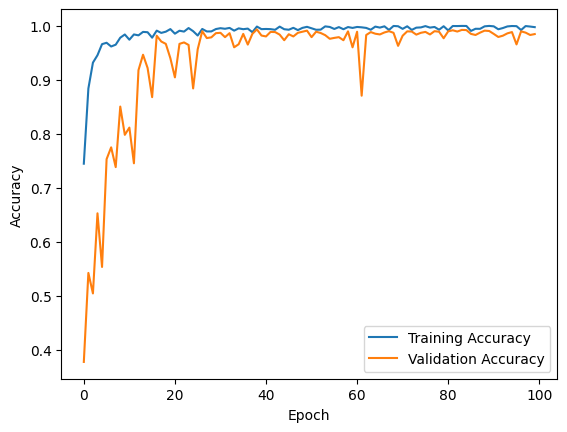

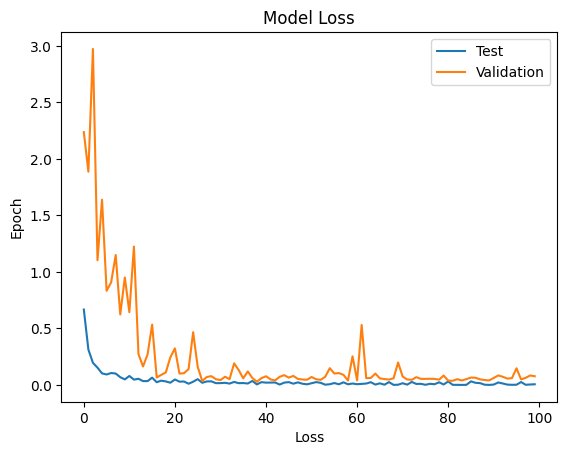

In [ ]:
# Train the model
history = model.fit(X_train_prep, y_train, batch_size=32, epochs=100, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_prep, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

## Classification Using DenseNet 121

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (128, 128, 3)
num_classes = 4

# Define the input
input_layer = Input(shape = input_shape)

# Load DenseNet169 model with pre-trained weights
base_model2 = DenseNet121(weights = 'imagenet', include_top = False, input_tensor = input_layer)

# Add Global Average Pooling layer
gap = GlobalAveragePooling2D()(base_model2.output)

# Dense layers for classification
dense2 = Dense(512, activation='relu')(gap)
output_layer = Dense(num_classes, activation='softmax')(dense2)

# Define the model
model2 = Model(inputs = input_layer, outputs = output_layer)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 134, 134, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                            

Epoch 1/100
373/373 [==============================] - 34s 74ms/step - loss: 0.5412 - accuracy: 0.7952 - val_loss: 6.6073 - val_accuracy: 0.3526
Epoch 2/100
373/373 [==============================] - 20s 55ms/step - loss: 0.2417 - accuracy: 0.9125 - val_loss: 7.2680 - val_accuracy: 0.3210
Epoch 3/100
373/373 [==============================] - 22s 58ms/step - loss: 0.1792 - accuracy: 0.9373 - val_loss: 1.9573 - val_accuracy: 0.5675
Epoch 4/100
373/373 [==============================] - 22s 58ms/step - loss: 0.1170 - accuracy: 0.9580 - val_loss: 0.5181 - val_accuracy: 0.8499
Epoch 5/100
373/373 [==============================] - 22s 59ms/step - loss: 0.1201 - accuracy: 0.9592 - val_loss: 0.5325 - val_accuracy: 0.8341
Epoch 6/100
373/373 [==============================] - 22s 58ms/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 1.0629 - val_accuracy: 0.7136
Epoch 7/100
373/373 [==============================] - 21s 56ms/step - loss: 0.0792 - accuracy: 0.9722 - val_loss: 0.2835 - val_ac

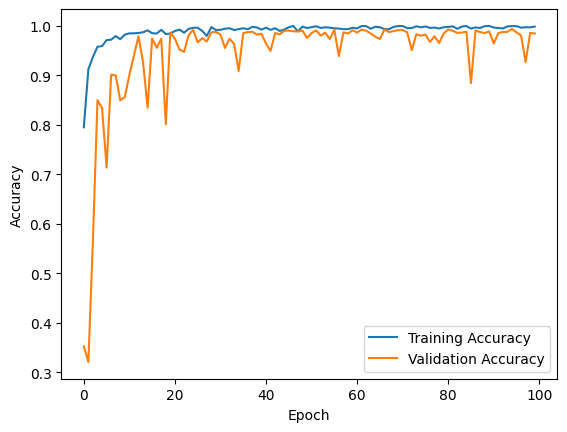

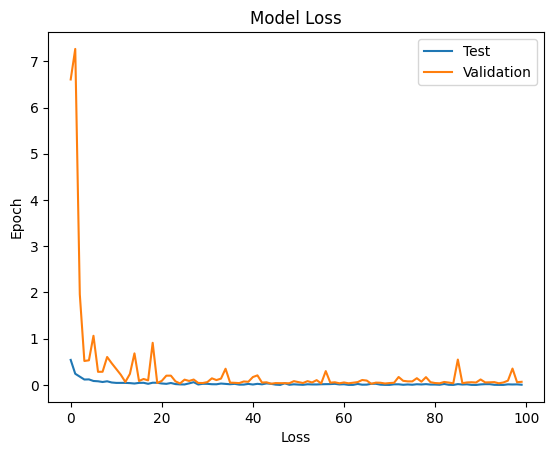

In [ ]:
# Train the model
history2 = model2.fit(X_train_prep, y_train, batch_size=32, epochs=100, validation_split=0.2)

# Evaluate the model
test_loss2, test_accuracy2 = model2.evaluate(X_test_prep, y_test)
print(f"Test accuracy: {test_accuracy2}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

## Classification Using Deep CNN

In [ ]:
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

In [ ]:
from keras import regularizers

model3 = keras.models.Sequential()

model3.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal", input_shape=(128, 128, 3)))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal")) # Added new Conv2D layer
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model3.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.20))

model3.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal")) # Added new Conv2D layer
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.20))

model3.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.25))

model3.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal")) # Added new Conv2D layer
model3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.25))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)))
model3.add(keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(0.01)))
model3.add(keras.layers.Dense(4, activation="softmax"))

In [ ]:
model3.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
history3 = model3.fit(X_train_prep, y_train_int, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_prep, y_test_int))

Epoch 1/100
466/466 [==============================] - 8s 17ms/step - loss: 2.2093 - accuracy: 0.4207 - val_loss: 1.1947 - val_accuracy: 0.5750
Epoch 2/100
466/466 [==============================] - 3s 6ms/step - loss: 0.9596 - accuracy: 0.6247 - val_loss: 0.7943 - val_accuracy: 0.7131
Epoch 3/100
466/466 [==============================] - 3s 6ms/step - loss: 0.7242 - accuracy: 0.7320 - val_loss: 0.5854 - val_accuracy: 0.8086
Epoch 4/100
466/466 [==============================] - 3s 6ms/step - loss: 0.6070 - accuracy: 0.7804 - val_loss: 0.4725 - val_accuracy: 0.8432
Epoch 5/100
466/466 [==============================] - 3s 6ms/step - loss: 0.5085 - accuracy: 0.8204 - val_loss: 0.4100 - val_accuracy: 0.8733
Epoch 6/100
466/466 [==============================] - 3s 6ms/step - loss: 0.4594 - accuracy: 0.8425 - val_loss: 0.3274 - val_accuracy: 0.9064
Epoch 7/100
466/466 [==============================] - 3s 7ms/step - loss: 0.4072 - accuracy: 0.8618 - val_loss: 0.2934 - val_accuracy: 0.918

In [ ]:
get_ac = history3.history['accuracy']
get_los = history3.history['loss']
val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']

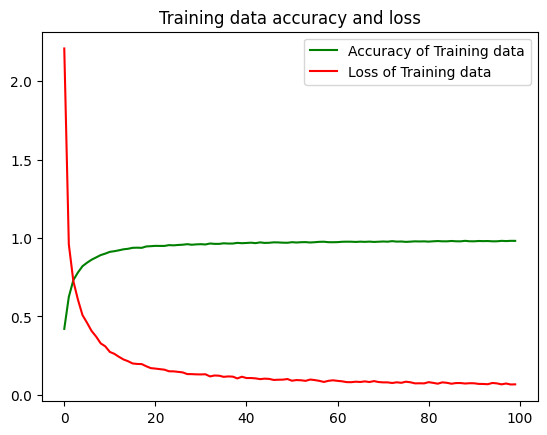

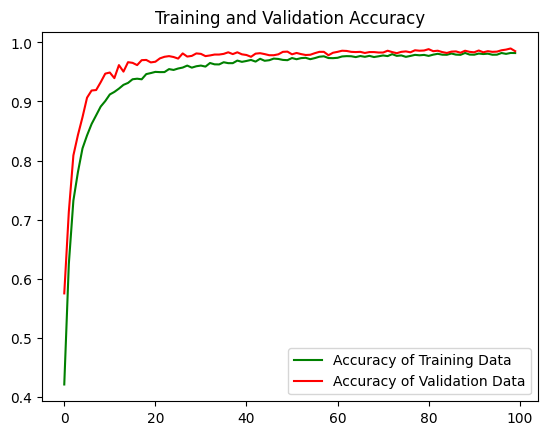

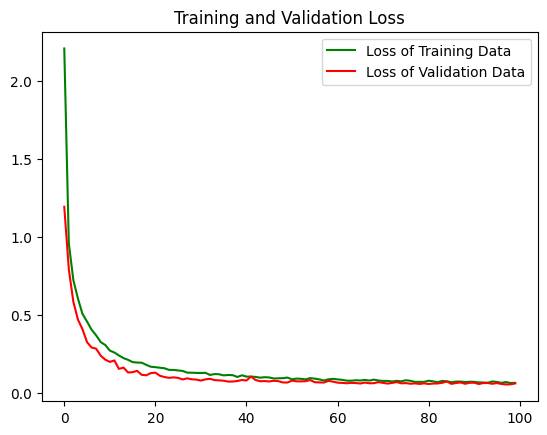

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Confusion Matrix, Recall, Precision, F1 score

83/83 [==============================] - 3s 20ms/step


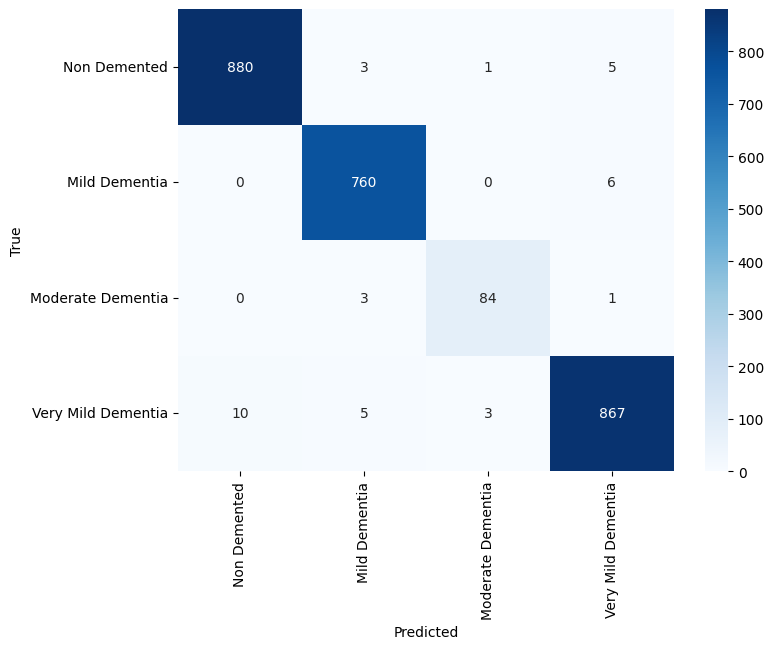

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = model.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels
class_names = ['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very Mild Dementia']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on test set
y_pred = model.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

83/83 [==============================] - 1s 17ms/step
Precision: 0.985921103736539
Recall: 0.9859208523592086
F1 Score: 0.9859139919860113


83/83 [==============================] - 2s 12ms/step


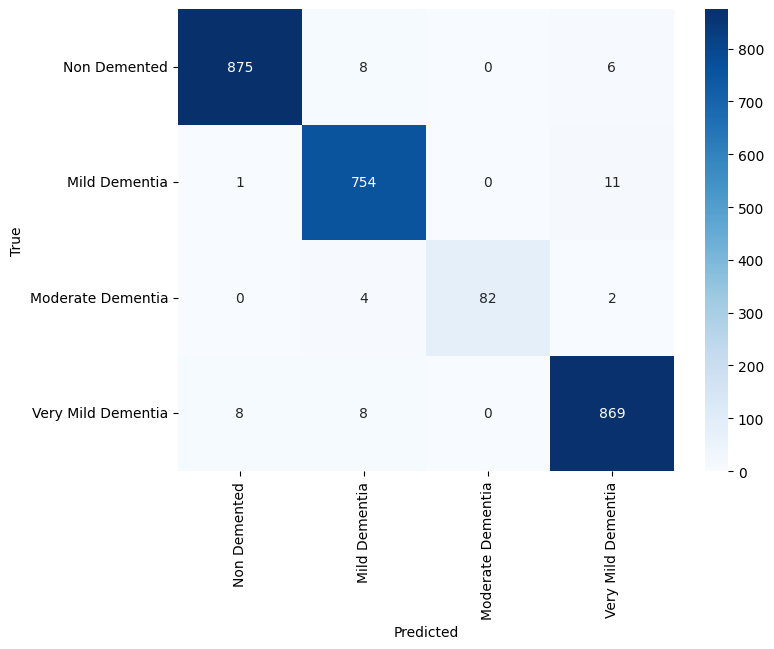

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = model2.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels
class_names = ['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very Mild Dementia']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on test set
y_pred = model2.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

83/83 [==============================] - 1s 15ms/step
Precision: 0.9818188746415779
Recall: 0.9817351598173516
F1 Score: 0.981725424068194


83/83 [==============================] - 0s 3ms/step


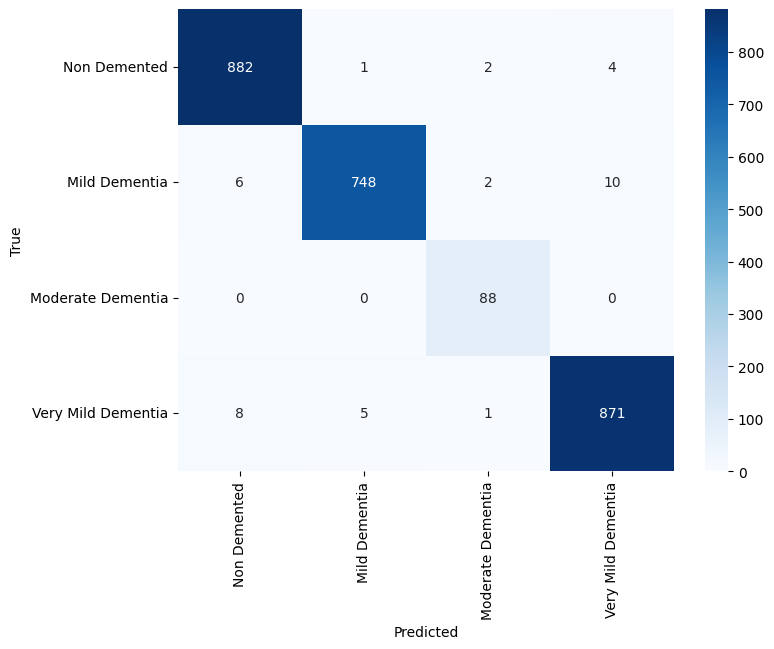

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = model3.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels
class_names = ['Non Demented', 'Mild Dementia', 'Moderate Dementia', 'Very Mild Dementia']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on test set
y_pred = model3.predict(X_test_prep)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

83/83 [==============================] - 0s 3ms/step
Precision: 0.9852673902161798
Recall: 0.9851598173515982
F1 Score: 0.9851657155258613


# Predictions

100.0% Confidence This Is Mild Dementia
100.0% Confidence This Is Mild Dementia
100.0% Confidence This Is Mild Dementia
100.0% Confidence This Is Mild Dementia


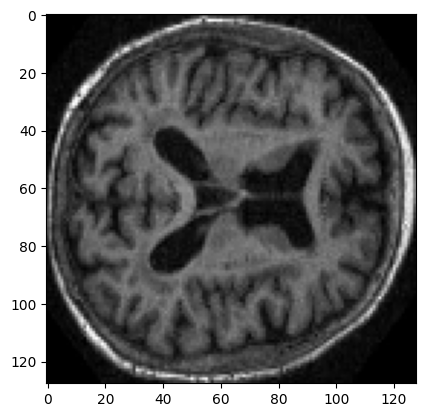

In [ ]:
input_image_path = 'Data/Mild Dementia/OAS1_0028_MR1_mpr-1_145.jpg'
i2 = preprocess_input_image(input_image_path, IMG_SIZE)

from matplotlib.pyplot import imshow
img = cv2.resize(i2, (128, 128))
x2 = img.reshape(1, 128, 128, 3)


res1 = model.predict_on_batch(x2)
res2 = model2.predict_on_batch(x2)
res3 = model3.predict_on_batch(x2)

classification = np.argmax((res1 + res2 + res3) / 3)

imshow(img)
print(f"{((res1[0][classification] + res2[0][classification] + res3[0][classification]) / 3 )* 100}% Confidence This Is {names(classification)}")
print(f"{res1[0][classification]*100}% Confidence This Is {names(classification)}")
print(f"{res2[0][classification]*100}% Confidence This Is {names(classification)}")
print(f"{res3[0][classification]*100}% Confidence This Is {names(classification)}")

99.98909632364908% Confidence This Is Very Mild Dementia
99.9998688697815% Confidence This Is Very Mild Dementia
99.99686479568481% Confidence This Is Very Mild Dementia
99.97054934501648% Confidence This Is Very Mild Dementia


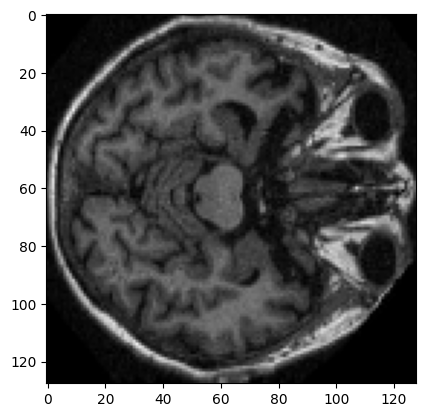

In [ ]:
input_image_path = 'Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_138.jpg'
i3 = preprocess_input_image(input_image_path, IMG_SIZE)

from matplotlib.pyplot import imshow
img = cv2.resize(i3, (128, 128))
x3 = img.reshape(1, 128, 128, 3)


res1 = model.predict_on_batch(x3)
res2 = model2.predict_on_batch(x3)
res3 = model3.predict_on_batch(x3)

classification = np.argmax((res1 + res2 + res3) / 3)

imshow(img)
print(f"{((res1[0][classification] + res2[0][classification] + res3[0][classification]) / 3 )* 100}% Confidence This Is {names(classification)}")
print(f"{res1[0][classification]*100}% Confidence This Is {names(classification)}")
print(f"{res2[0][classification]*100}% Confidence This Is {names(classification)}")
print(f"{res3[0][classification]*100}% Confidence This Is {names(classification)}")

99.97843106587729% Confidence This Is Non Demented
100.0% Confidence This Is Non Demented
99.99994039535522% Confidence This Is Non Demented
99.93534684181213% Confidence This Is Non Demented


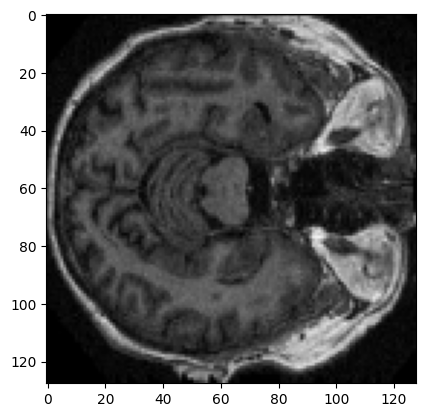

In [ ]:
input_image_path = 'Data/Non Demented/OAS1_0001_MR1_mpr-1_108.jpg'
i4 = preprocess_input_image(input_image_path, IMG_SIZE)

from matplotlib.pyplot import imshow
img = cv2.resize(i4, (128, 128))
x4 = img.reshape(1, 128, 128, 3)


res1 = model.predict_on_batch(x4)
res2 = model2.predict_on_batch(x4)
res3 = model3.predict_on_batch(x4)

classification = np.argmax((res1 + res2 + res3) / 3)

imshow(img)
print(f"{((res1[0][classification] + res2[0][classification] + res3[0][classification]) / 3 )* 100}% Confidence This Is {names(classification)}")
print(f"{res1[0][classification]*100}% Confidence This Is {names(classification)}")
print(f"{res2[0][classification]*100}% Confidence This Is {names(classification)}")
print(f"{res3[0][classification]*100}% Confidence This Is {names(classification)}")

In [ ]:
# Save models
tf.keras.models.save_model(model, 'e_model.h5')
tf.keras.models.save_model(model2, 'e_model2.h5')
tf.keras.models.save_model(model3, 'e_model3.h5')